Nomes:

Adrieli Silva de Carlis    

Nathalia dos Santos Oliveira

Maria Giovana Cavalcante do Nascimento

#Projeto JK

###Introdução
Com o avanço das tecnologias digitais, a maneira como consumimos música sofreu transformações significativas. Os serviços de streaming, como o Spotify, ganharam uma enorme popularidade, proporcionando acesso instantâneo a milhões de músicas de diferentes gêneros e épocas. Esse aumento no uso de plataformas de streaming levanta várias questões como sobre o que impulsionou esse crescimento e se existe alguma relação entre o aumento de streams e características específicas das músicas.
O presente projeto visa investigar esses aspectos utilizando um dataset de músicas populares no Spotify, Apple Music e Deezer, explorando variáveis como número de streams e características musicais. A análise se concentra em identificar tendências que podem ter influenciado o aumento no uso de serviços de streaming, oferecendo insights sobre como fatores musicais e culturais podem impactar o sucesso e a popularidade das músicas ao longo do tempo, analisando se houve diferença no período pré-pandemia com pós-pandemia.


### Objetivos
Este projeto tem como objetivo principal analisar dados de streaming de músicas, especialmente do Spotify, para entender os fatores que influenciaram o aumento do consumo de música ao longo dos anos. De forma específica o projeto visa:


*   Identificar padrões de consumo de música: Analisar as tendências gerais de crescimento no número de streams, investigando se características como gênero musical, popularidade dos artistas e fatores musicais contribuem para o sucesso em plataformas de streaming.
*   Comparar períodos pré e pós-pandemia: Avaliar se houve mudanças significativas nos padrões de consumo de música antes e depois da pandemia de COVID-19, comparando variáveis como volume de streams, gêneros mais consumidos e comportamentos específicos de ouvintes. Esta comparação ajudará a entender se a pandemia influenciou o aumento do uso dessas plataformas ou alterou as preferências dos ouvintes.


##Importando bibliotecas utilizadas

In [ ]:
import pandas as pd #manipulação e analise de dados
import numpy as np #para manupular arrays e operações numericas
from sklearn.feature_extraction.text import CountVectorizer #converter textos em númerico
import matplotlib.pyplot as plt #plotar dados
import seaborn as sns #melhorar a vizualização dos dados
from sklearn.model_selection import train_test_split #dividir dados em treinamento e teste para análises
from sklearn.linear_model import LinearRegression #para treinar modelo de regressão linear
import plotly.express as px  # Biblioteca para visualizações interativas
from scipy import stats  # Biblioteca para estatísticas, usada aqui para calcular Z-scores

##Importação data sete no kaggle

In [ ]:
#Primeiro devemos instalar o Kaggle com os seguintes pessos.
!pip install kaggle
!kaggle datasets download -d abdulszz/spotify-most-streamed-songs
!unzip spotify-most-streamed-songs.zip

Dataset URL: https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs
License(s): CC0-1.0
  0% 0.00/60.0k [00:00<?, ?B/s]
100% 60.0k/60.0k [00:00<00:00, 60.1MB/s]
Archive:  spotify-most-streamed-songs.zip
  inflating: Spotify Most Streamed Songs.csv  


In [ ]:
#Baixando o data set que iremos analisar
url = "Spotify Most Streamed Songs.csv"
data = pd.read_csv(url)
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found


**Coletando informações dos dados.**

In [ ]:
#Verificando as informações dos nossos dados
#quantas colunas tem, nome das colunas, tipo do dado e etc
#Esta etapa é importante para sabermos o tipo de dados que estamos analisando
#além de determinar a melhor forma de usa-los e quanto de memoria está usando.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

- O indice deste data sete vai de 0 ate 952
Esse dado é importante para entendermos o tamanho do data sete, entendendo a posição das linhas, o que auxilia na manipulação dos dados.

In [ ]:
data.index

RangeIndex(start=0, stop=953, step=1)

In [ ]:
#Verificando as colunas do Data set
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')



---


# Tratamento de dados

In [ ]:
#Se há dado nulo
data.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [ ]:
# Substituir valor NaN com '0' em dados do tipo string
data['in_shazam_charts'] = data['in_shazam_charts'].fillna('0')
data['key'] = data['key'].fillna('0')

In [ ]:
# Remover vírgulas e converter colunas em um tipo numérico
data['in_shazam_charts'] = data['in_shazam_charts'].astype(str).str.replace(',', '').astype(int)
data['in_deezer_playlists'] = data['in_deezer_playlists'].astype(str).str.replace(',', '').astype(int)

In [ ]:
# Substituir linhas da coluna streams contendo caracter alfabético com 0
data.loc[data['streams'].str.contains('[a-zA-Z]', regex=True, na=False), 'streams'] = '0'

In [ ]:
# Transformar dado da coluna stream em float
data['streams']=data['streams'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    int64  
 14  bpm                   953 non-null    int64  
 15  key                   9



---

# **Graficos de dispersão**


A relação parece semelhante, mas com um número maior de playlists e uma maior dispersão dos dados, o que pode indicar que, embora haja uma correlação positiva, o impacto de estar em mais playlists no Spotify varia bastante em comparação ao número de streams.




---
Ambos os gráficos mostram que, para Apple Music e Spotify, existe uma correlação positiva entre o número de playlists em que uma música aparece e o número de reproduções.

A diferença chave parece ser o alcance das plataformas, com o gráfico do Spotify mostrando uma gama maior de playlists (com números muito mais altos no eixo X) e uma maior dispersão, sugerindo que, no Spotify, o impacto de estar em muitas playlists é mais variável.


Isso pode estar relacionado ao fato de que o Spotify tem um maior número de usuários e playlists, o que torna mais difícil prever exatamente o impacto que estar em playlists tem no número de streams comparado ao Apple Music.

---




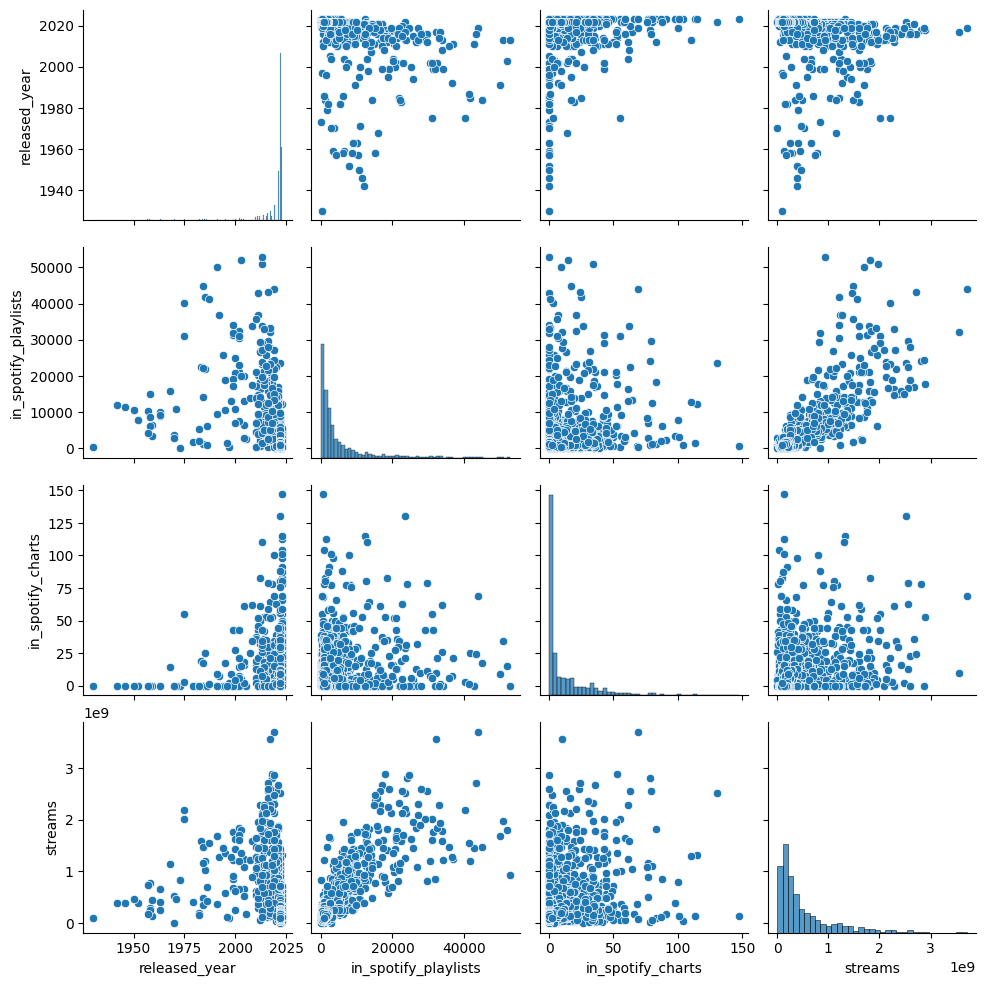

In [ ]:
sns.pairplot(data[['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'streams']])
plt.show()

released_year vs. streams: As músicas lançadas mais recentemente parecem ter mais streams. Mostrando uma tendência de crescimento de streams nas músicas mais novas, principalmente após 2000.

in_spotify_playlists vs. streams: Quanto mais playlists a música está incluída, maior tende a ser o número de streams.

in_spotify_charts vs. streams: Músicas que apareceram em rankings do Spotify frequentemente também têm mais streams, indicando que a visibilidade em charts pode aumentar a popularidade.

in_spotify_playlists vs. in_spotify_charts: Há uma correlação, sugerindo que músicas que entram nos rankings tendem a estar em muitas playlists também, afirmando a relação in_spotify_playlists vs. stream.

Distribuição de streams: A maioria das músicas possui um número relativamente baixo de streams, com poucas exceções que ultrapassam 1 bilhão de reproduções.


# Análise Temporal
Para entender melhor a evolução dos streams e analisar o impacto da pandemia e gerações de novas plataformas de redes sociais e de videos curtos, se faz importante a análise temporal dos streams de música.

---



##Lançamentos por ano

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')


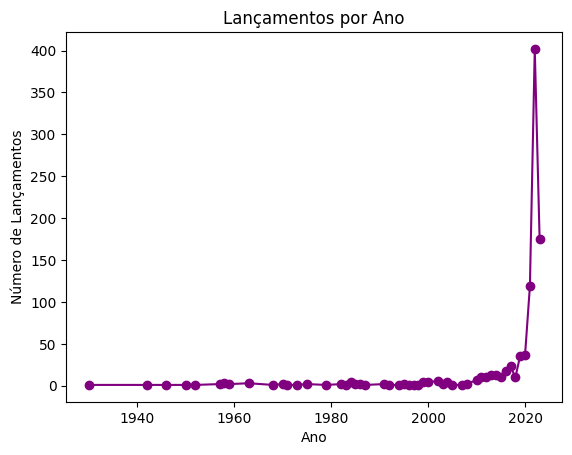

In [ ]:
#Conferindo as colunas do data set
print(data.columns)

# O data set possui a coluna 'released_year' que provavelmente possui a relação
#de lançamentod de musicas por ano.
df_year = data.groupby('released_year').size()

# Plotar o gráfico de lançamentos por ano
df_year.plot(kind='line', marker='o', color='purple', title='Lançamentos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Lançamentos')
plt.show()

Podemos visualizar aqui novamente que em 2022 houve o maior número de lançamentos de músicas desde 1930, essa tendencia pode indicar uma maior democratização de musicas e artistas por meio de midia e plataformas digitais, bem como consumidores, tornando as necessidade do mercado cada vez mais rapido.

##Streams totais por ano

In [ ]:
#Agrupamento por ano de lançamento somando o total de streams para cada ano
data_grouped_ano=data.groupby('released_year').agg(streamsum=('streams', 'sum')).reset_index()

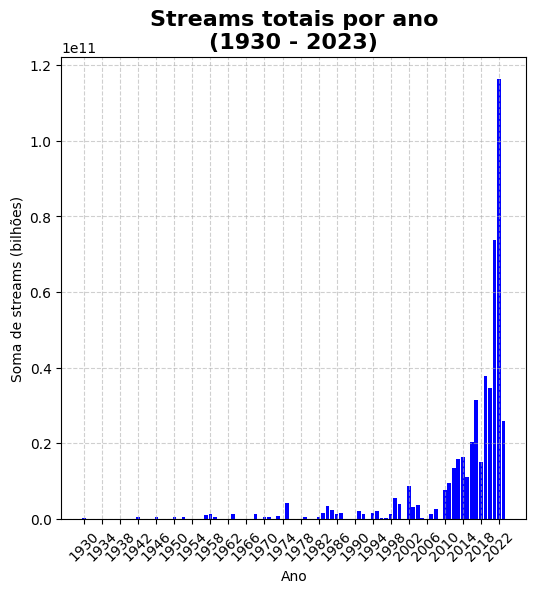

In [ ]:
#Criação de gráfico para visualizar quantidade de streams totais por ano
plt.figure(figsize=(6, 6))

plt.bar(data_grouped_ano['released_year'], data_grouped_ano['streamsum'], color='blue', width=0.8)

x_labels = sorted(data_grouped_ano['released_year'].unique())
plt.xticks(np.arange(min(x_labels), max(x_labels)+1,4), rotation=45)

plt.title('Streams totais por ano\n(1930 - 2023)', fontsize=16, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Soma de streams (bilhões)')

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

De acordo com esse gráfico, pode-se perceber que a partir do surgimento de plataformas de streaming de música, como Spotify e Apple music, houve um aumento no número de streams por ano quando comparado com anos anteriores à essa tecnologia. Além disso, o maior número de streams ocorreu em 2022, podendo-se relacionar com vários fatores da época, como o período pós-pandemia e ascensão de plataformas como tiktok.

In [ ]:
#Concatenando as colunas como string e convertendo em tipos de registro de data
data['release_date'] = pd.to_datetime(data['released_year'].astype(str) + '-' +
                                    data['released_month'].astype(str) + '-' +
                                    data['released_day'].astype(str))

In [ ]:
#Categorizando meses de lançamento em semestres
data['release_season'] = data['release_date'].dt.month % 12 // 3 + 1

In [ ]:
#Extrair ano e mês do formato YYYY-MM
data['year_month'] = data['release_date'].dt.strftime('%Y-%m')

In [ ]:
#Convertendo dados em string
data['year_Season']=data['released_year'].astype(str) + '_' + data['release_season'].astype(str)

In [ ]:
# Conferindo por valores duplicados
data.duplicated().sum()

0

In [ ]:
#Agrupamento dos dados em ano e semestre e soma dos streams para cada período
data_grouped_ano_semestre=data.groupby('year_Season').agg(streamsum=('streams', 'sum')).reset_index()

In [ ]:
#Qual primeiro registro em ano por semestre de stream
data_grouped_ano_semestre.year_Season.min()

'1930_1'

In [ ]:
#Qual o último registro em ano por semestre de stream
data_grouped_ano_semestre.year_Season.max()

'2023_3'

Com essas informações, pode-se visualizar que o primeiro dado que se tem registrado de strem é proveniente do 1º semestre de 1930 e o último dado do 3º semestre de 2023

## Musicas adicionadas em playlists em determidado tempo

In [ ]:
#Criando dataframe agrupando dados por semestre e calculando a soma de quantas vezes as músicas aparecem em paradas de streamings para cada período
data_charts = data.groupby('year_Season').agg(
    in_spotify_charts_sum=('in_spotify_charts', 'sum'),
    in_deezer_charts_sum=('in_deezer_charts', 'sum'),
    in_shazam_charts_sum=('in_shazam_charts', 'sum'),
    in_apple_charts_sum=('in_apple_charts', 'sum'),
).reset_index()

In [ ]:
#Criando dataframe agrupando dados por smeestre e calculando a soma de quantas vezes as músicas aparecem em playlists de streamings para cada período
data_playlists= data.groupby('year_Season').agg(
    in_spotify_playlists_sum=('in_spotify_playlists', 'sum'),
    in_apple_playlists_sum=('in_apple_playlists', 'sum'),
    in_deezer_playlists_sum=('in_deezer_playlists', 'sum'),
).reset_index()

In [ ]:
#Ordenação dos dataframes por ordem cronológica
data_charts = data_charts.sort_values('year_Season')
data_playlists = data_playlists.sort_values('year_Season')

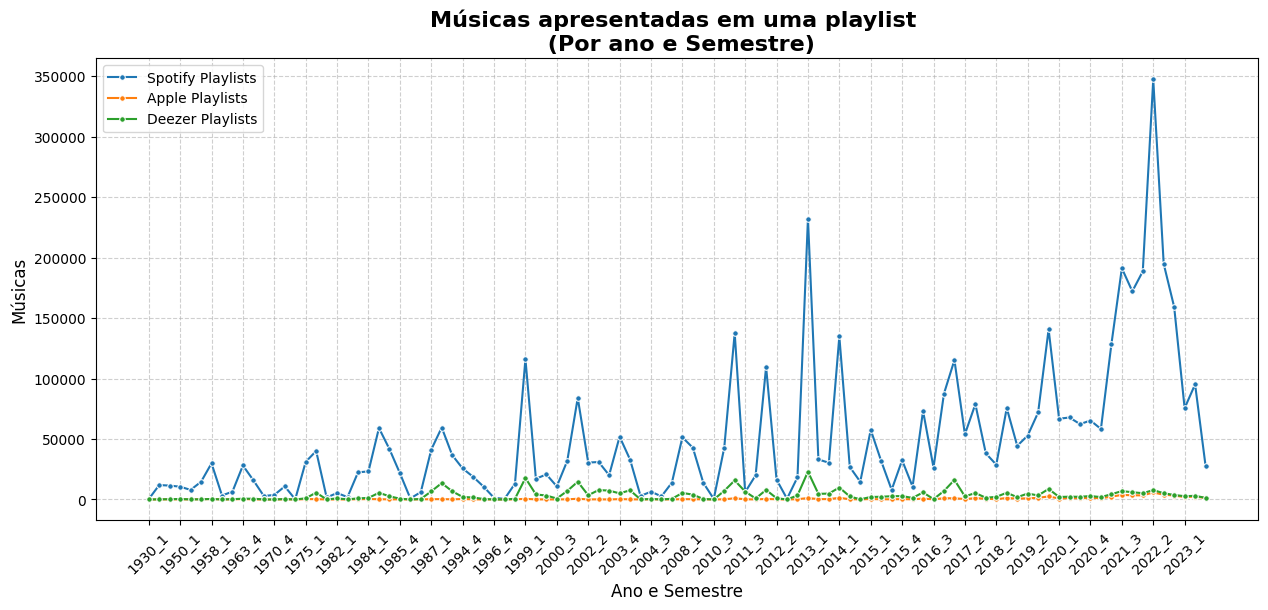

In [ ]:
#Gráfico que demonstra quantidade de músicas apresentadas em uma playlist por streaming e por ano e semestre
plt.figure(figsize=(15,6))
sns.lineplot(x='year_Season', y='in_spotify_playlists_sum', data=data_playlists,
             label='Spotify Playlists', marker='o',markersize=4)
sns.lineplot(x='year_Season', y='in_apple_playlists_sum', data=data_playlists,
             label='Apple Playlists', marker='o', markersize=4)
sns.lineplot(x='year_Season', y='in_deezer_playlists_sum', data=data_playlists,
             label='Deezer Playlists', marker='o', markersize=4)
x_labels = sorted(data['year_Season'].unique())
plt.xticks(ticks=range(0, len(x_labels),3), labels=x_labels[::3], rotation=45)
plt.title('Músicas apresentadas em uma playlist \n (Por ano e Semestre)', fontsize=16, fontweight='bold')
plt.xlabel('Ano e Semestre', fontsize=12)
plt.ylabel('Músicas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Pode-se observar que há mais playlists sendo apresentadas pelo Spotify quando comparado com outras plataformas de streaming como a Apple e o Deezer. Assim como pode-se visualizar que houve um crescimento do número de músicas lançadas no spotify em 2022.

#Evolução dos parâmetros musicais de acordo com o passar do tempo

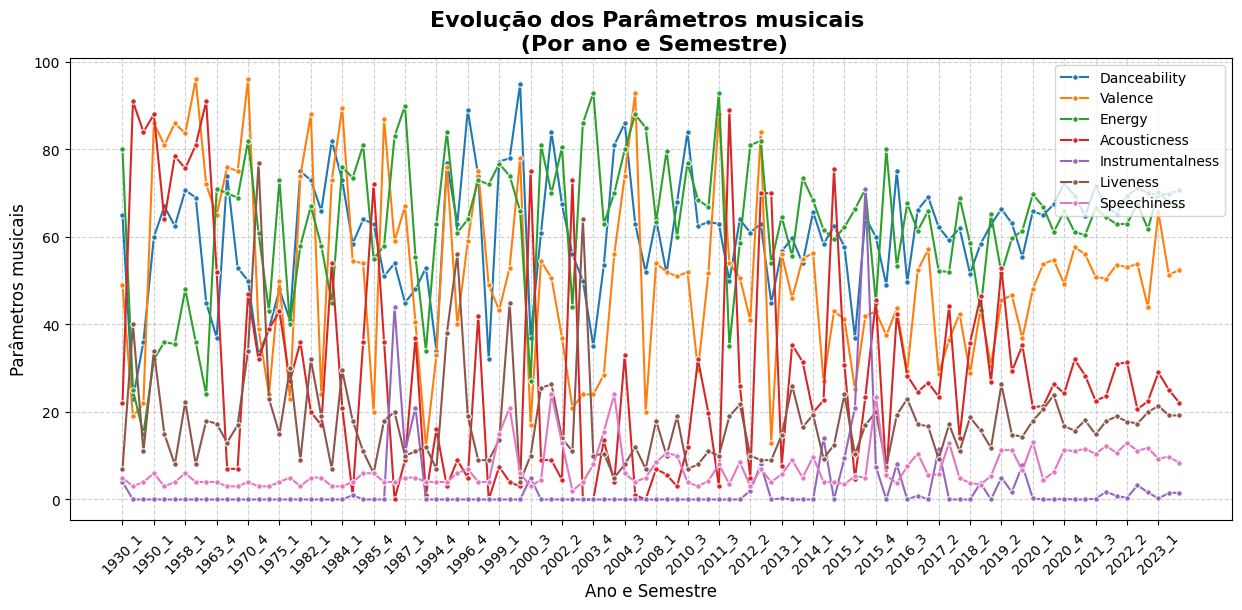

In [ ]:
#Juntando os parâmetros musicais em um só gráfico por ano e semestre
plt.figure(figsize=(15,6))

danceability_by_decade = data.groupby('year_Season')['danceability_%'].mean().reset_index()
decade_valence = data.groupby('year_Season')['valence_%'].mean()
decade_valence_df = decade_valence.to_frame().reset_index()
decade_valence_df.columns = ['year_Season', 'valence_%']

decade_energy = data.groupby('year_Season')['energy_%'].mean()
decade_energy_df = decade_energy.to_frame().reset_index()
decade_energy_df.columns = ['year_Season', 'energy_%']

decade_acousticness = data.groupby('year_Season')['acousticness_%'].mean()
decade_acousticness_df = decade_acousticness.to_frame().reset_index()
decade_acousticness_df.columns = ['year_Season', 'acousticness_%']

decade_instrumentalness = data.groupby('year_Season')['instrumentalness_%'].mean()
decade_instrumentalness_df = decade_instrumentalness.to_frame().reset_index()
decade_instrumentalness_df.columns = ['year_Season', 'instrumentalness_%']

decade_liveness = data.groupby('year_Season')['liveness_%'].mean()
decade_liveness_df = decade_liveness.to_frame().reset_index()
decade_liveness_df.columns = ['year_Season', 'liveness_%']

decade_speechiness = data.groupby('year_Season')['speechiness_%'].mean()
decade_speechiness_df = decade_speechiness.to_frame().reset_index()
decade_speechiness_df.columns = ['year_Season', 'speechiness_%']

sns.lineplot(x='year_Season', y='danceability_%', data=danceability_by_decade,
             label='Danceability', marker='o',markersize=4)
sns.lineplot(x='year_Season', y='valence_%', data=decade_valence_df,
             label='Valence', marker='o', markersize=4)
sns.lineplot(x='year_Season', y='energy_%', data=decade_energy_df,
             label='Energy', marker='o', markersize=4)
sns.lineplot(x='year_Season', y='acousticness_%', data=decade_acousticness_df,
             label='Acousticness', marker='o', markersize=4)
sns.lineplot(x='year_Season', y='instrumentalness_%', data=decade_instrumentalness_df,
             label='Instrumentalness', marker='o', markersize=4)
sns.lineplot(x='year_Season', y='liveness_%', data=decade_liveness_df,
             label='Liveness', marker='o', markersize=4)
sns.lineplot(x='year_Season', y='speechiness_%', data=decade_speechiness_df,
             label='Speechiness', marker='o', markersize=4)

x_labels = sorted(data['year_Season'].unique())
plt.xticks(ticks=range(0, len(x_labels),3), labels=x_labels[::3], rotation=45)
plt.title('Evolução dos Parâmetros musicais \n (Por ano e Semestre)', fontsize=16, fontweight='bold')
plt.xlabel('Ano e Semestre', fontsize=12)
plt.ylabel('Parâmetros musicais', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



* A valência, ou seja, positividade no conteúdo musical, parece ser menor em períodos próximos de crises humanitárias, como pode-se observar em próximo de 1940, 2008 e 2022.


* Em alguns pontos, parece que enquanto a energia musical está alta, o som acústico presente na musica está geralmente baixo.



* Percebe-se que a presença de elementos de performance ao vivo atinge seu ápice na década de 1970.


* A adequação de uma música para dançar atinge seu ápice em 1999, enquanto seu menor valor está entre 1930 e 1950.




#Popularidade de artistas
Nessa etapa utilizamos os dados das colunas streams, charts e playlists para identificar quais são os artistas mais populares, a análise foi feita com base em streams.
Nesta análise temos o interesse de entender e determinar quais são os artistas mais populares entre os streams. Tendo isso em vista pensamos em juntar os dados de streams, charts e playlists para fazer esse levantamento e identificar os artistas mais escutados.

Antes de trabalhar com os dados vamos veririfar como estão descritos esses dados e se há dados vazios.

In [ ]:
print(data.dtypes)

track_name                      object
artist(s)_name                  object
artist_count                     int64
released_year                    int64
released_month                   int64
released_day                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                        float64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists              int64
in_deezer_charts                 int64
in_shazam_charts                 int64
bpm                              int64
key                             object
mode                            object
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
cover_url                       object
release_date            d

Os dados da coluna streams como verificado a cima, percebemos que não é numérico e sim um object. Precisamos converter a coluna streams para númerico, assim podmeos fazer a análise.

In [ ]:
# Converter a coluna 'streams' para numérico
#Passo necessario para a análise sem isso não é possivel faze-la
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')


In [ ]:
#Verificando se a coluna "artist(s)_name" esta vazio
print(data['artist(s)_name'].isnull().sum())


0


In [ ]:
#verificando os valores dos dados estão agrupados por artistas e se está tudo correto.
#Caso o agrupmento esteja errado não há como fazer análise.
#Como é possivel verificar no resultado o agrupamento esta correto.
print(df_artists.head(10))


artist(s)_name
The Weeknd         1.418555e+10
Taylor Swift       1.405366e+10
Ed Sheeran         1.390895e+10
Harry Styles       1.160865e+10
Bad Bunny          9.997800e+09
Olivia Rodrigo     7.442149e+09
Eminem             6.183806e+09
Bruno Mars         5.846921e+09
Arctic Monkeys     5.569807e+09
Imagine Dragons    5.272485e+09
Name: streams, dtype: float64


O grafico encontrado demonstra os artistas mais escutados

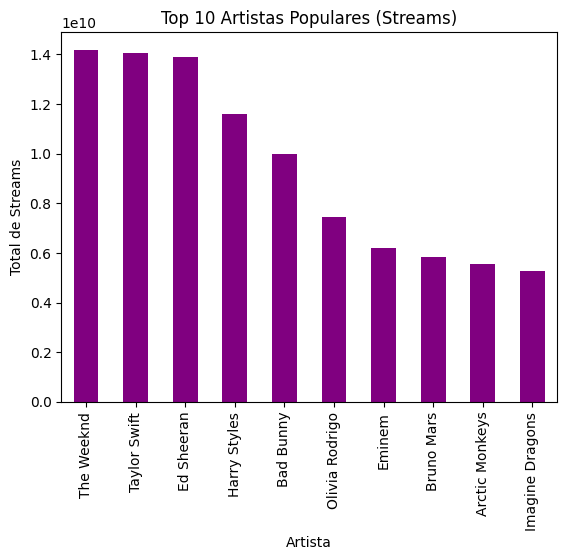

In [ ]:
# Agrupando por artista e somar os streams
df_artists = data.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False)

# Exibindo os 10 artistas mais populares
top_artists = df_artists.head(10)

# Plotando os artistas mais populares por streams para melhor vizualização
top_artists.plot(kind='bar', color='purple', title='Top 10 Artistas Populares (Streams)')
plt.xlabel('Artista')
plt.ylabel('Total de Streams')
plt.show()


Há uma diferença considerável entre os primeiros colocados (The Weeknd, Taylor Swift, e Ed Sheeran) e os últimos (Arctic Monkeys e Imagine Dragons), indicando uma variação notável de popularidade, apontando que artistas mais novos no mercado e com maior afinidade com as ultimas gerações tem se destacado bem mais


## Comparação entre Plataformas de streams musicais (Spotify, Apple, Deezer)
O Data Frame que escolhemos para análisar possui dados de playlists de três streams de musica, logo pretendemos aqui fazer a comparação entre as playlists de diferentes plataformas.

In [ ]:
#Verificando se as colunas que iremos usar são numericas
#'in_spotify_playlists', 'in_apple_playlists' e 'in_deezer_playlists'
print(data[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].dtypes)


in_spotify_playlists    int64
in_apple_playlists      int64
in_deezer_playlists     int64
dtype: object


In [ ]:
#Convertendo as colunas que estão em interge e objeto para numerico
data['in_spotify_playlists'] = pd.to_numeric(data['in_spotify_playlists'], errors='coerce')
data['in_apple_playlists'] = pd.to_numeric(data['in_apple_playlists'], errors='coerce')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')

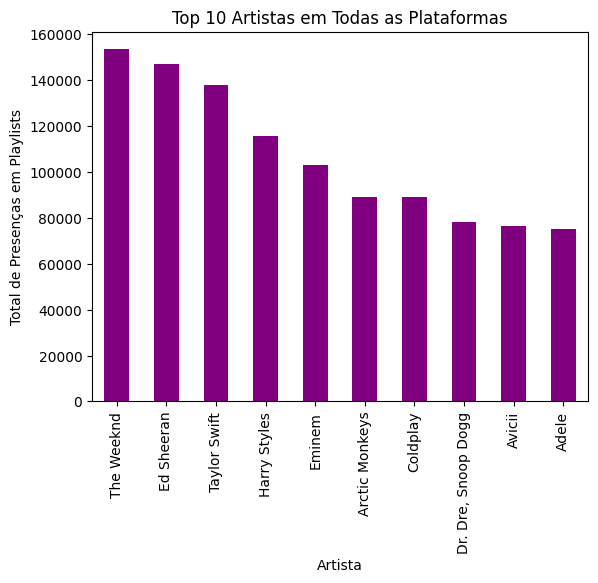

In [ ]:
# Somar as colunas de playlists
data['total_playlists'] = data[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)

# Agrupar por artista e somar a presença em playlists
df_platforms = data.groupby('artist(s)_name')['total_playlists'].sum().sort_values(ascending=False)

# Plotar os artistas mais populares em todas as plataformas
top_platforms_artists = df_platforms.head(10)
top_platforms_artists.plot(kind='bar', color='purple', title='Top 10 Artistas em Todas as Plataformas')
plt.xlabel('Artista')
plt.ylabel('Total de Presenças em Playlists')
plt.show()


É possivel perceber que ao juntar os dados dos Streams há uma diferença entre o Top 10 artistas, permanecendo os 4 primeiros mais escutados, e os demais há uma diferença. Pode-se dizer que talvez há uma diferença de perfil de ouvintes entre as plataformas.

##Correlação entre popularidade e caracteristicas musicais
Nesse Bloco queremos verificar se as caracteristicas musicais tem interferencia direta na popularidade das musicas. Queremos verificar se musicas mais alegres, dançantes tem uma preferencia maior entre os ouvintes.

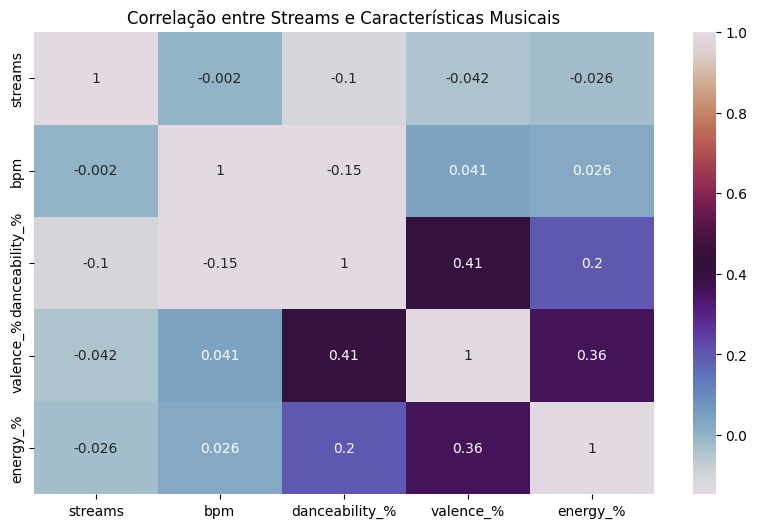

In [ ]:
#Para essa análise, fizemos uma matriz de correlação os dados de quantidade de streams,
#bpm, dançabilidade, Valencia
#(que é uma métrica emocional, descreve a emoção que a música pode gerar) e a energia
correlacao_matrix = data[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']].corr()

# Plotar o mapa de  para a vizualização dos dados
plt.figure(figsize=(10,6))
sns.heatmap(correlacao_matrix, annot=True, cmap='twilight')
plt.title('Correlação entre Streams e Características Musicais')
plt.show()


É possivel perceber que as características analisadas parecem ter pouca influência direta nos streams, visto que todas as correlações são muito baixas.

Existe uma correlação moderada entre a dançabilidade, a positividade e a energia das músicas, sugerindo que esses atributos estão relacionados entre si, o que é esperado, já que músicas mais dançantes geralmente possuem mais energia e são percebidas como mais felizes.

A ausência de correlação significativa entre streams e os atributos musicais indica que a popularidade (streams) pode ser influenciada mais por fatores externos, como promoção, tendências culturais, ou o artista em si, do que pelas características específicas da música

#Análise da distribuição das Características Musicais


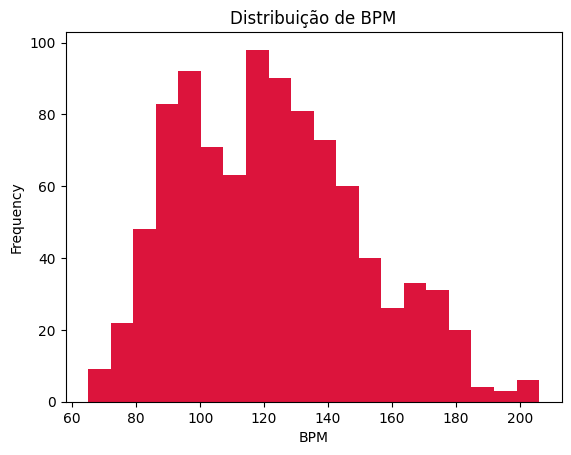

In [ ]:
# Histograma para BPM
data['bpm'].plot(kind='hist', bins=20, color='crimson', title='Distribuição de BPM')
plt.xlabel('BPM')
plt.show()


A maior parte das músicas está entre 80 e 130 BPM, com picos em torno de 100 e 120 BPM, indicando que esses tempos são os mais comuns. Esses valores normalmente correspondem a gêneros populares como pop, rock e dance, que tendem a ter um ritmo moderado.

A distribuição sugere que há mais músicas em ritmos médios, com menos músicas extremamente lentas (abaixo de 80 BPM) ou muito rápidas (acima de 160 BPM).

Músicas com mais de 160 BPM são menos frequentes, o que é comum, pois tempos muito rápidos são mais característicos de gêneros específicos, como música eletrônica rápida (e.g., hardcore, drum and bass) ou algumas vertentes do punk.


#Distribuição de "Danceability" e Streams
Está analíse é para ver se há relação entre a danceabilidade e os streams sem os outliers para verificar se a danceabilidade tem relação ao valor de streams.

In [ ]:
# Calcular os Z-scores de cada valor nas colunas numéricas do DataFrame
# O Z-score indica quantos desvios padrão um valor está acima ou abaixo da média.
# Valores com Z-score acima de 3 ou abaixo de -3 são considerados outliers.
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))

# Identificar outliers (valores com Z-score maior que 3 ou menor que -3)
# Aqui, selecionamos todas as linhas onde pelo menos uma coluna numérica tem Z-score > 3 ou < -3.
data_outliers = data[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]

# Exibir a quantidade de outliers encontrados
print(f'Número de outliers detectados: {data_outliers.shape[0]}')

# Remover as linhas com outliers, mantendo apenas as linhas onde todos os valores numéricos
# têm Z-score entre -3 e 3.
data_sem_outliers = data[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

# Criar um gráfico de dispersão (scatter plot) para visualizar a relação entre 'danceability_%' e 'streams'
# Utilizamos a biblioteca Plotly para criar um gráfico interativo, facilitando a análise visual.
figura = px.scatter(
    data_sem_outliers,  # Conjunto de dados sem outliers
    x='danceability_%',  # Define a coluna 'danceability_%' como eixo X
    y='streams',         # Define a coluna 'streams' como eixo Y
    color='artist_count',  # Colorir os pontos de acordo com o número de artistas, para adicionar uma dimensão extra ao gráfico
    hover_data=['track_name', 'artist(s)_name'],  # Informações que aparecem ao passar o mouse sobre os pontos (nome da música e artista)
    title='Danceability vs Streams',
    color_continuous_scale='Plasma'
)
# Exibir o gráfico
figura.show()


Número de outliers detectados: 197




*   O que podemos perceber é que a
danceabilidade não influencia muito no quanto a música é tocada ou escutada, uma vez que é possivel perceber no grafico que há uma distribuição uniforme.
*   Podemos ver que a maioria das músicas com alta contagem de streams tende a ter uma danceabilidade entre 50% e 80%, o que sugere que músicas com níveis moderados a altos de danceabilidade tendem a ter mais sucesso.
*   Mesmo músicas que possuem alta danceabilidade, não tendem a ter o mesmo reflexo no número de streams. Ou seja, mesmo com alta danceabilidade, muitas músicas tiveram baixo número de streams, demonstrando que esse fator não tem muita influência no sucesso da música.
*   Observando as cores, podemos notar que músicas com mais artistas (em tons mais claros) não necessariamente têm mais streams, mas há algumas concentrações de músicas com colaborações entre os valores de danceabilidade média. Isso pode sugerir que colaborações não são um fator decisivo para o sucesso, mas podem estar presentes em músicas com boa aceitação.




In [ ]:
#Grupamento de dados por artista para calcular a soma total de streams, número de faixas e médias de variáveis
artist_analysis = data.groupby('artist(s)_name').agg({
    'streams': 'sum',
    'track_name': 'count',
    'danceability_%': 'mean',
    'energy_%': 'mean',
    'valence_%': 'mean',
    'bpm': 'mean'
}).reset_index()
artist_analysis.rename(columns={'track_name': 'num_tracks'}, inplace=True)
artist_analysis.head()

,artist(s)_name,streams,num_tracks,danceability_%,energy_%,valence_%,bpm
0,(G)I-DLE,2.669833e+08,2,77.5,87.0,67.0,133.0
1,"21 Savage, Gunna",6.068094e+07,1,68.0,73.0,29.0,148.0
2,"24kgoldn, Iann Dior",1.699402e+09,1,70.0,72.0,76.0,91.0
3,50 Cent,1.202723e+09,1,90.0,71.0,79.0,90.0
4,"A$AP Rocky, Metro Boomin, Roisee",9.418647e+07,1,60.0,53.0,13.0,90.0


<ipython-input-52-75c924cdbb11>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='energy_%', y='artist(s)_name', data=top_artists_energy, palette='Blues_d')


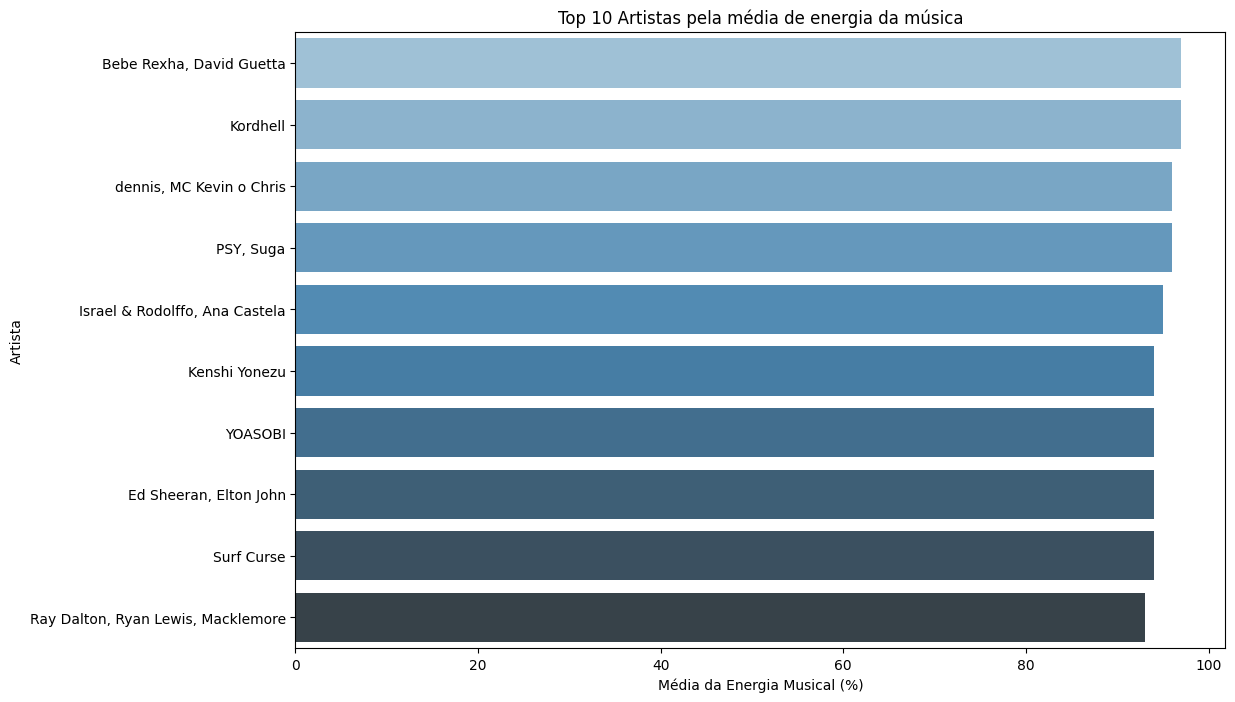

In [ ]:
#Seleção dos 10 artistas com maior média de energia nas músicas
top_artists_energy = artist_analysis.sort_values(by='energy_%', ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='energy_%', y='artist(s)_name', data=top_artists_energy, palette='Blues_d')
plt.title('Top 10 Artistas pela média de energia da música')
plt.xlabel('Média da Energia Musical (%)')
plt.ylabel('Artista')
plt.show()

 energia musical é uma métrica que indica a intensidade e o entusiasmo de uma faixa, sendo frequentemente associada a batidas rápidas, sons altos e ritmos dinâmicos.
No topo da lista, temos Bebe Rexha e David Guetta, com a média de energia mais alta entre os artistas analisados. Isso sugere que suas músicas tendem a ser mais vibrantes e envolventes, características comuns em gêneros como o pop e a música eletrônica.

Em seguida, Kordhell e Dennis com MC Kevin o Chris também apresentam altos níveis de energia, indicando que suas colaborações provavelmente incluem elementos animados e dançantes, típicos do funk e de outros estilos populares no Brasil. PSY e Suga aparecem na metade superior do ranking, destacando-se por sua capacidade de manter os ouvintes engajados com batidas fortes e ritmos acelerados, possivelmente em faixas de K-pop ou hip-hop.

A lista continua com Israel & Rodolffo e Ana Castela, Kenshi Yonezu, e YOASOBI, artistas conhecidos por incorporar elementos energéticos em suas músicas, embora em estilos variados que podem incluir influências de sertanejo, J-pop e música eletrônica.
Por fim, Ed Sheeran com Elton John, Surf Curse, e Ray Dalton com Ryan Lewis e Macklemore fecham o ranking. Apesar de estarem na parte inferior do top 10, ainda mantêm uma média de energia significativa, mostrando que suas músicas conseguem capturar a atenção do público com uma mistura de ritmos cativantes e melodias vibrantes.

<ipython-input-44-1728ac433409>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




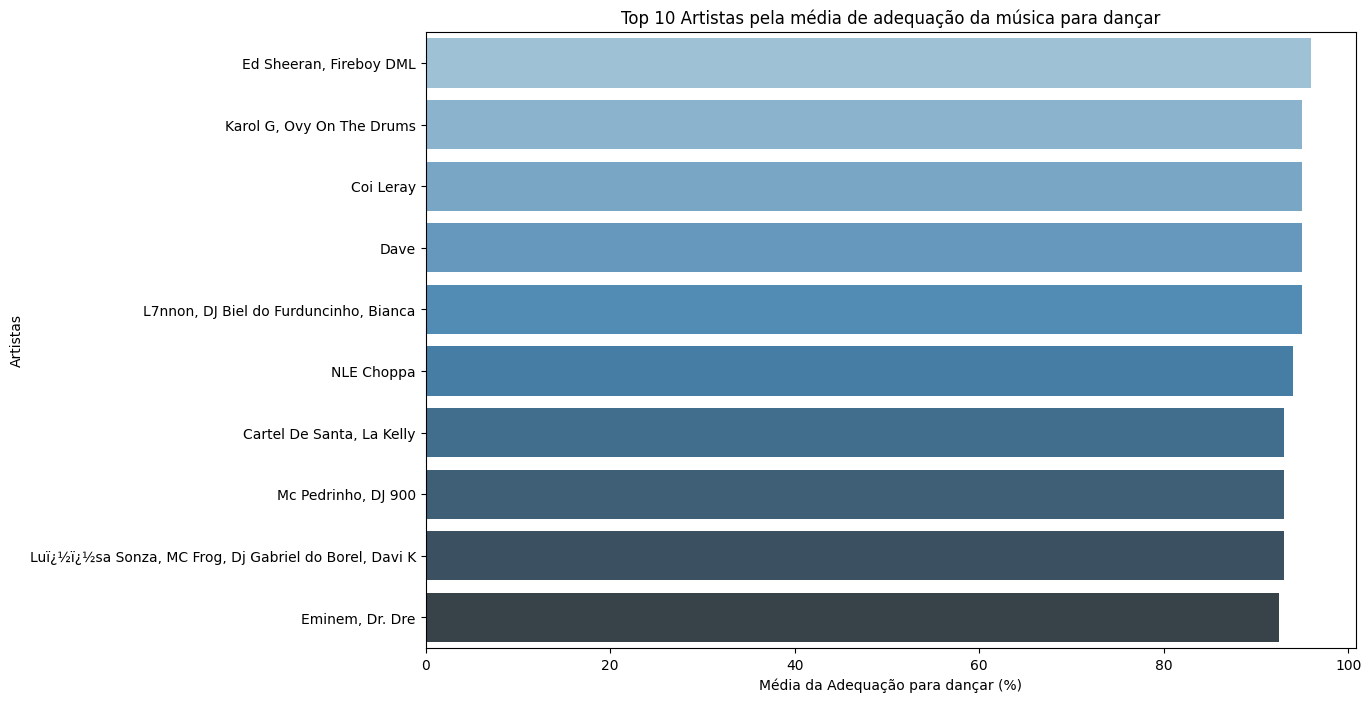

In [ ]:
#Seleção dos 10 artistas com maior média de danceabilidade nas músicas
top_artists_energy = artist_analysis.sort_values(by='danceability_%', ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='danceability_%', y='artist(s)_name', data=top_artists_energy, palette='Blues_d')
plt.title('Top 10 Artistas pela média de adequação da música para dançar')
plt.xlabel('Média da Adequação para dançar (%)')
plt.ylabel('Artistas')
plt.show()

O gráfico apresenta os 10 principais artistas em termos de média de adequação de suas músicas para dançar, medido em porcentagem. No topo da lista, estão Ed Sheeran e Fireboy DML, com a maior média de adequação. Seguindo-os, aparecem Karol G e Ovy On The Drums, e em terceiro lugar, Coi Leray. Cada artista ou colaboração é representada por uma barra horizontal, cuja extensão indica a porcentagem de adequação das músicas para dançar.

É interessante notar que a diferença entre as médias dos artistas é sutil, indicando uma competição acirrada nesse aspecto. Todos os artistas listados têm uma média superior a 60%, o que demonstra uma alta competência em produzir músicas consideradas adequadas para dançar. Eminem e Dr. Dre fecham o ranking, mantendo uma boa colocação, mas com uma leve diferença em relação aos primeiros colocados.

###Conclusão
É possível verificar que o advento de plataformas de streaming nos anos 2000 influenciaram no aumento expressivo de lançamento de músicas e quantidade de streams, assim como pode-se verificar que o período pós-pandemia, possivelmente com o maior consumo de tendências virais e músicas para redes sociais e vídeos curtos, levaram a um aumento da quantidade de streams. Foi observado também que fatores musicais se alteraram ao longo do tempo a depender do contexto da época, por exemplo, no período atual percebe-se a presença maior de fatores musicais como a energia e danceabilidade alta.